In [1]:
from scipy.io import loadmat, whosmat
from typing import *
from copy import deepcopy
from functools import lru_cache
import numpy as np

In [2]:
from fastplotlib import ImageWidget

In [3]:
mat_path = '/home/clewis7/wasabi/hantmanlab/from_tier2/Jay/videos/M234Slc17a7_Gtacr2/postprocessed/M234_20170404.mat'

In [4]:
@lru_cache
def get_ethogram(trial_index: int):
    m = loadmat(mat_path)
    behaviors = sorted([b.split('_')[0] for b in m['data'].dtype.names if 'scores' in b])

    all_behaviors = [
        "Lift",
        "Handopen",
        "Grab",
        "Sup",
        "Atmouth",
        "Chew"
    ]

    sorted_behaviors = [b for b in all_behaviors if b in behaviors]

    ethograms = []

    mat_trial_index = np.argwhere(m["data"]["trial"].ravel() == (trial_index + 1))
    # Trial not found in JAABA data
    if mat_trial_index.size == 0:
        return False

    print(mat_trial_index.shape)
    mat_trial_index = mat_trial_index.item()

    for b in sorted_behaviors:
        behavior_index = m['data'].dtype.names.index(f'{b}_postprocessed')
        ethograms.append(m['data'][mat_trial_index][0][behavior_index])

    sorted_behaviors = [b.lower() for b in sorted_behaviors]

    return np.hstack(ethograms).T, sorted_behaviors

In [5]:
get_ethogram(trial_index=1)

(1, 1)


(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 ['lift', 'handopen', 'grab', 'sup', 'atmouth', 'chew'])

(1, 1)
(1, 1)


<Axes: >

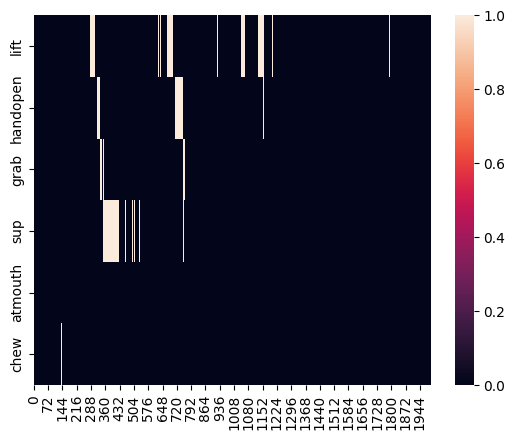

In [6]:
import seaborn as sns
sns.heatmap(get_ethogram(10)[0], yticklabels=get_ethogram(1)[1])

In [11]:
movie_path = '/home/clewis7/Desktop/movie_comb.avi'

In [12]:
from mesmerize_core.arrays import LazyVideo

In [13]:
from fastplotlib import ImageWidget

In [14]:
data = LazyVideo(path=movie_path, as_grayscale=True)

In [15]:
data.shape

(1998, 260, 768)

In [16]:
iw = ImageWidget(data=data,
                dims_order='txy',
                slider_dims='t' )

RFBOutputContext()

/home/clewis7/repos/mesmerize-core/mesmerize_core/arrays/_video.py:87: UserWarning: min not implemented for LazyTiff, returning min of 0th index
  warn("min not implemented for LazyTiff, returning min of 0th index")
/home/clewis7/repos/mesmerize-core/mesmerize_core/arrays/_video.py:92: UserWarning: max not implemented for LazyTiff, returning min of 0th index
  warn("max not implemented for LazyTiff, returning min of 0th index")
/home/clewis7/repos/fastplotlib/fastplotlib/graphics/features/_base.py:34: UserWarning: converting float64 array to float32
  warn(f"converting {array.dtype} array to float32")


In [17]:
iw.show()

In [18]:
iw.plot.camera.scale.y = -1